<a href="https://colab.research.google.com/github/JeeAu/NBA_Prediction/blob/main/Jee_Au_Wah_NBA_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Check for missing Data
import sklearn as sk
import pandas as pd

train_data = pd.read_csv('/content/nba_train (2).csv')
test_data = pd.read_csv('/content/nba_test (1).csv')

#test for missing values in the dataset
train_data.info()
test_data.info()

#test for missing values in dataset
print(train_data.isnull().sum())
print(test_data.isnull().sum())

FileNotFoundError: [Errno 2] No such file or directory: '/content/nba_train (2).csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Check for Duplicate Dataset
import sklearn as sk
import pandas as pd

train_data = pd.read_csv('/content/nba_train (2).csv')
test_data = pd.read_csv('/content/nba_test (1).csv')

#test for duplicate values in dataset
print(train_data.duplicated().sum())

0


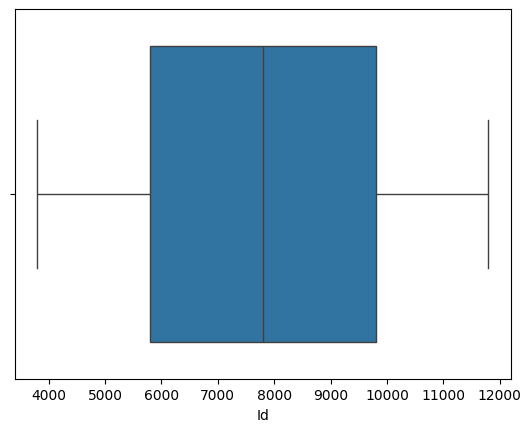

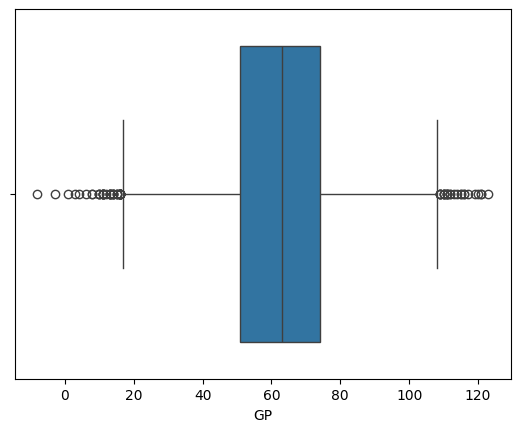

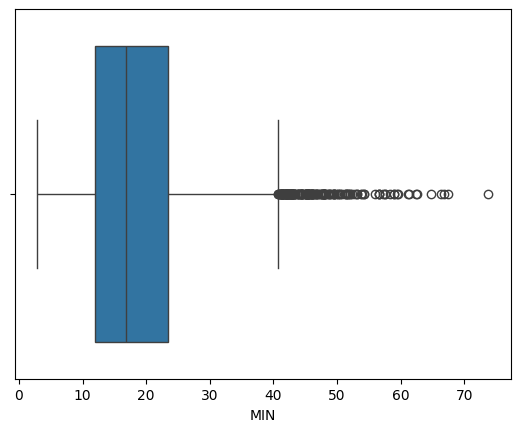

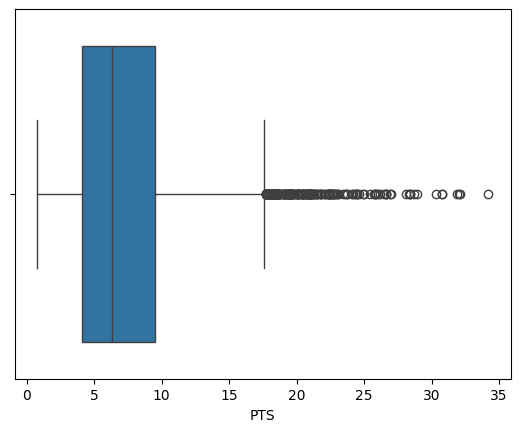

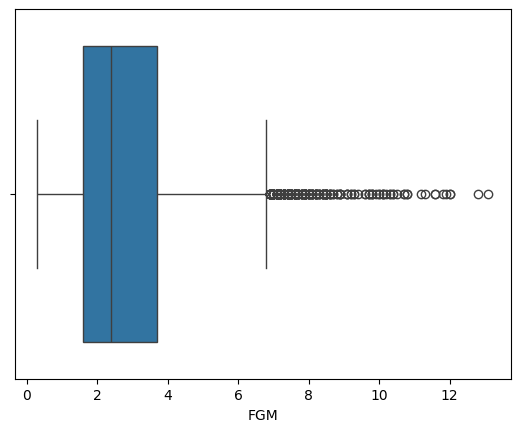

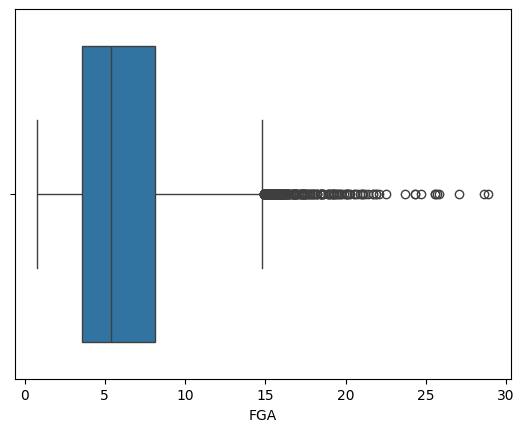

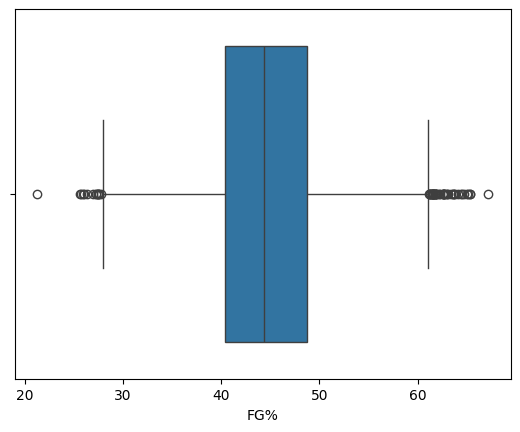

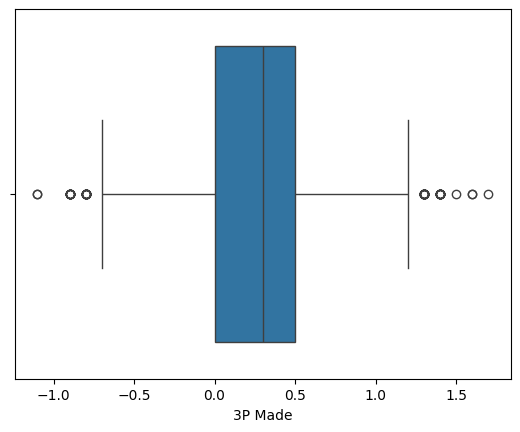

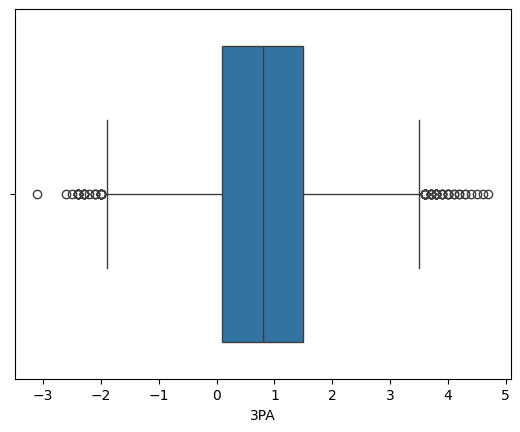

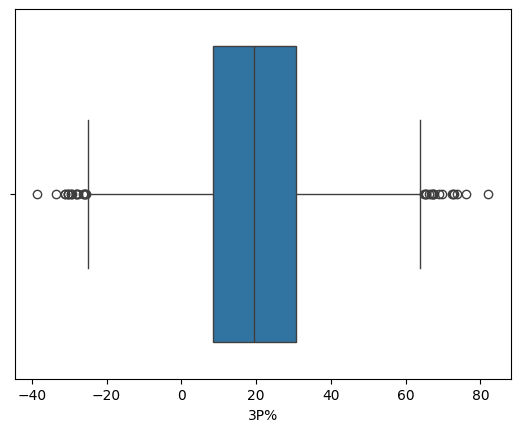

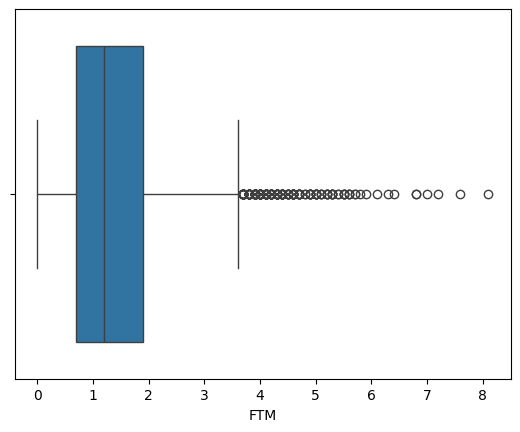

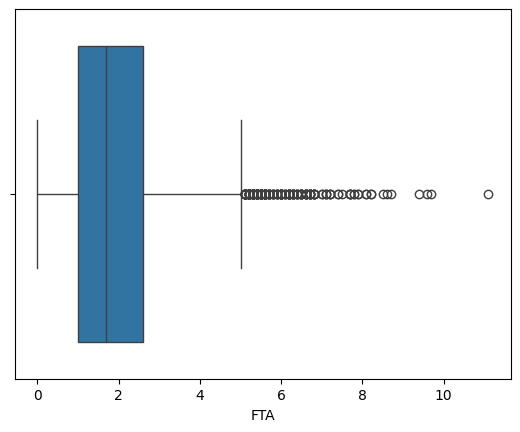

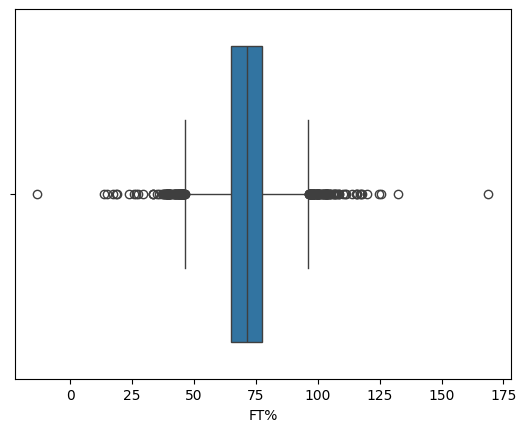

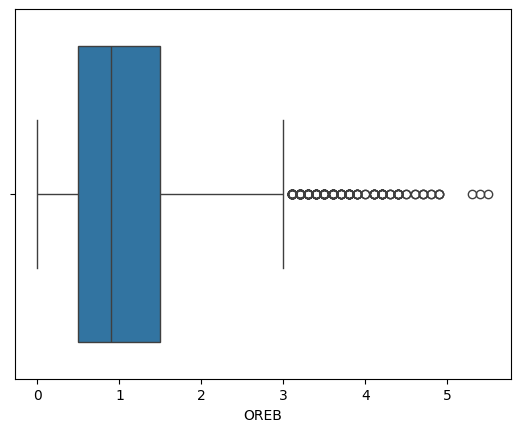

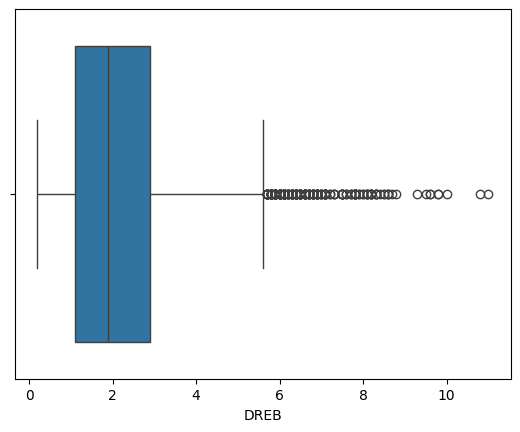

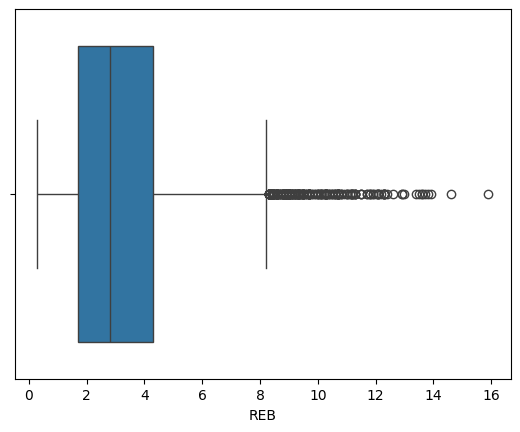

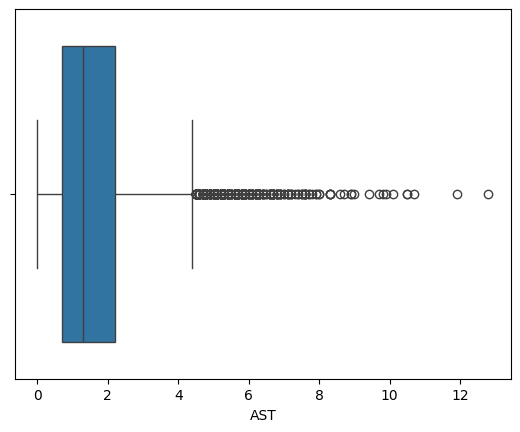

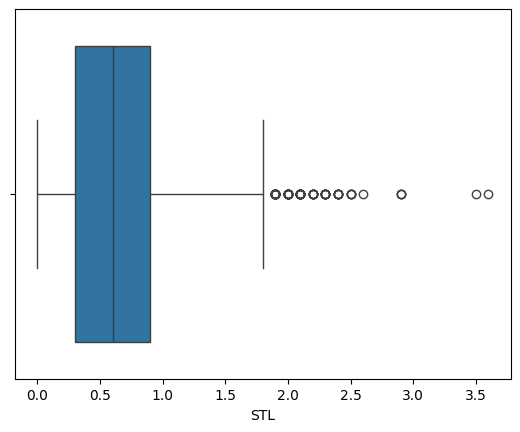

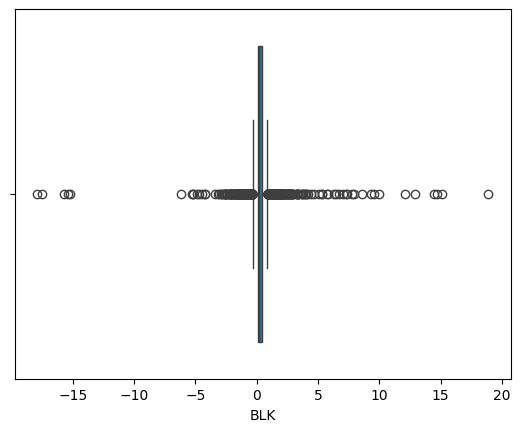

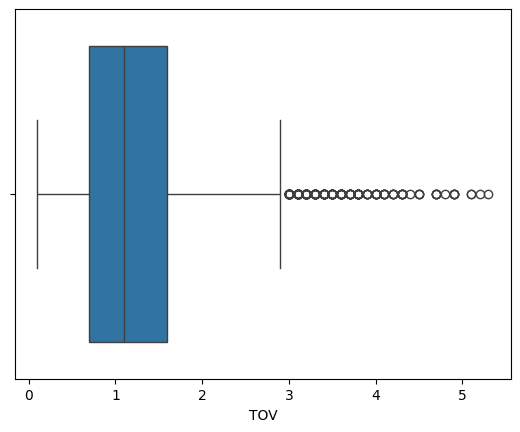

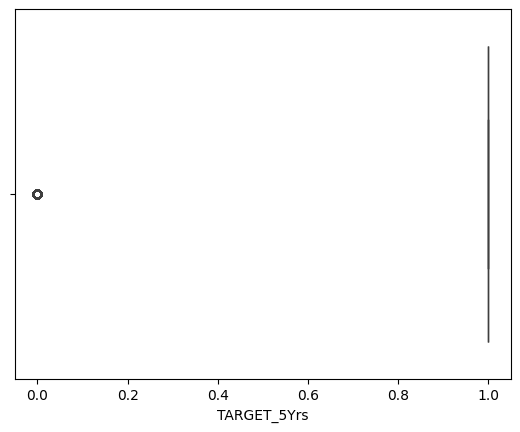

In [ ]:
#Check for any outliers
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

train_data = pd.read_csv('/content/nba_train (2).csv')
test_data = pd.read_csv('/content/nba_test (1).csv')


#tst for any outliers in the dataset
for column in train_data.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=train_data[column])
    plt.show()

In [ ]:
#Performing Normalisation
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv("/content/nba_train (2).csv")

# Separate numerical features for normalization
numerical_features = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
                      'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Check the normalized dataset
print(data)

         Id        GP       MIN       PTS       FGM       FGA       FG%  \
0      3799  0.671756  0.301834  0.209581  0.210938  0.199288  0.531590   
1      3800  0.633588  0.266573  0.290419  0.304688  0.252669  0.736383   
2      3801  0.709924  0.228491  0.110778  0.125000  0.131673  0.468410   
3      3802  0.541985  0.228491  0.221557  0.250000  0.209964  0.679739   
4      3803  0.541985  0.210155  0.086826  0.109375  0.092527  0.642702   
...     ...       ...       ...       ...       ...       ...       ...   
7995  11794  0.305344  0.088858  0.029940  0.031250  0.035587  0.413943   
7996  11795  0.473282  0.043724  0.029940  0.031250  0.021352  0.596950   
7997  11796  0.709924  0.356841  0.296407  0.289062  0.291815  0.518519   
7998  11797  0.358779  0.067701  0.050898  0.054688  0.053381  0.409586   
7999  11798  0.435115  0.229901  0.119760  0.109375  0.153025  0.246187   

       3P Made       3PA       3P%  ...       FTA       FT%      OREB  \
0     0.428571  0.435897  

In [ ]:
#Conducting OneHot-Encoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Transforming all the columns that has categorical variables to numerical variables
categorical_variables = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
                      'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']

# Create OneHotEncoder object
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical variables
encoded_variables = one_hot_encoder.fit_transform(data[categorical_variables])

# Convert the encoded variables into a DataFrame with auto-generated column names
encoded_df = pd.DataFrame(encoded_variables, columns=one_hot_encoder.get_feature_names_out(categorical_variables))

# Drop the original categorical variables from the original dataframe
data_encoded = data.drop(columns=categorical_variables)

# Concatenate the encoded variables with the original dataframe
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

# Check the transformed dataset
print(data_encoded)


ValueError: Shape of passed values is (8000, 1), indices imply (8000, 3786)

In [ ]:
#Conducting train test split
from sklearn.model_selection import train_test_split
import pandas as pd
# Load the dataset

test_data = pd.read_csv('/content/nba_test (1).csv')

# Split the training set into features (X) and target variable (y)
X_train = data.drop(columns=['Id', 'TARGET_5Yrs'])
y_train = data['TARGET_5Yrs']

# Split the test set into features (X_test)
X_test = test_data.drop(columns=['Id'])

# Perform train-test split on the training set
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.84      1.00      0.91      1337

    accuracy                           0.84      1600
   macro avg       0.42      0.50      0.46      1600
weighted avg       0.70      0.84      0.76      1600



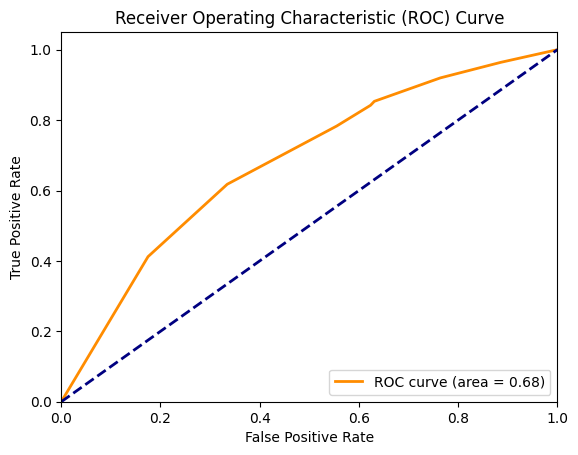

AUC: 0.68


In [ ]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd

# Load the dataset

test_data = pd.read_csv("/content/nba_test (1).csv")

# Split dataset into features and target variable
X = data.drop(['Id', 'TARGET_5Yrs'], axis=1)
y = data['TARGET_5Yrs']

# Perform train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
dtree = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3]}

# Perform grid search cross-validation
dtree_gscv = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5)
dtree_gscv.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = dtree_gscv.best_params_
best_score = dtree_gscv.best_score_

# Initialize and train the best model
dtree_best = DecisionTreeClassifier(**best_params, random_state=42)
dtree_best.fit(X_train, y_train)

# Predict on the validation set
y_pred = dtree_best.predict(X_val)

# Generate classification report
print(classification_report(y_val, y_pred))


##ROC CURVE FOR DECISION TREE
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Make predictions
y_pred_proba = dtree_best.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

auc_score = roc_auc_score(y_val, dtree_best.predict_proba(X_val)[:, 1])
print("AUC: {:.2f}".format(auc_score))


              precision    recall  f1-score   support

           0       0.29      0.02      0.05       405
           1       0.83      0.99      0.90      1995

    accuracy                           0.83      2400
   macro avg       0.56      0.51      0.47      2400
weighted avg       0.74      0.83      0.76      2400



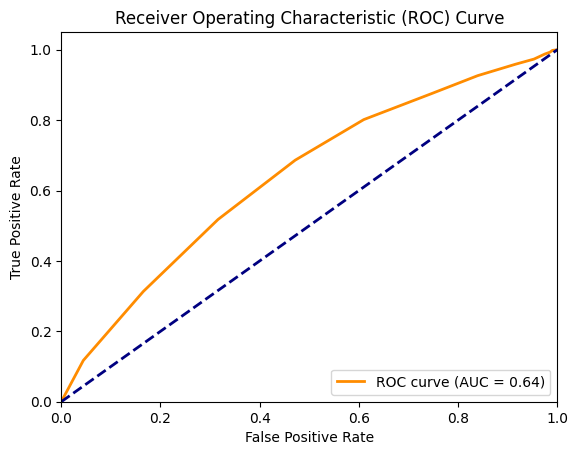

ROC AUC score: 0.6403589219963489


In [ ]:
#K Nearest Neighbour Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np

# Assuming 'train_data' is your dataset containing features and target variable
X = data.drop(['Id', 'TARGET_5Yrs'], axis=1)
y = data['TARGET_5Yrs']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier()

# Define hyperparameter grid for KNN
param_grid = {'n_neighbors': np.arange(1, 25)}

# Perform grid search cross-validation
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = knn_gscv.best_params_
best_score = knn_gscv.best_score_

# Initialize and train the best KNN model
knn_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
knn_best.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knn_best.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


#K Nearest Neighbour ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the predicted probabilities for class 1
y_scores = knn_best.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print ROC AUC score
print("ROC AUC score:", roc_auc)


In [ ]:
#Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your dataset containing features and target variable
X = data.drop(['Id', 'TARGET_5Yrs'], axis=1)
y = data['TARGET_5Yrs']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}

# Perform grid search cross-validation
rf_gscv = GridSearchCV(rf, param_grid, cv=5)
rf_gscv.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = rf_gscv.best_params_
best_score = rf_gscv.best_score_

# Initialize and train the best Random Forest model
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = rf_best.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

#### ROC CURVE FOR RANDOM FOREST CLASSFIER

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Predict the labels of the test set
y_pred = rf_best.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, rf_best.predict_proba(X_test)[:,1])
print("ROC AUC score: {}".format(roc_auc))

# Calculate predicted probabilities for class 1
y_pred_proba = rf_best.predict_proba(X_test)[:,1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


NameError: name 'data' is not defined

In [ ]:
#Support Vector Classifier Model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd


# Split dataset into features and target variable
X = data.drop(['Id', 'TARGET_5Yrs'], axis=1)
y = data['TARGET_5Yrs']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize Support Vector Classifier (SVC)
svc = SVC(probability=True, random_state=42)

# Define a parameter grid to search for the best parameters
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Use grid search to find the best parameters
svc_gscv = GridSearchCV(svc, param_grid, cv=5)
svc_gscv.fit(X_train, y_train)

best_params = svc_gscv.best_params_
best_score = svc_gscv.best_score_

svc_best = SVC(**best_params, probability=True, random_state=42)
svc_best.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = svc_best.predict(X_test)
print(classification_report(y_test, y_pred))


#ROC Curve for Support Vector Classifier Model
# Calculate ROC curve and AUC
y_pred_proba = svc_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Light Gradient Boosting Machine (LGBM) Model
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Assuming 'train_data' is your dataset containing features and target variable
X = data.drop(['Id', 'TARGET_5Yrs'], axis=1)
y = data['TARGET_5Yrs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LightGBM classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Define a parameter grid to search
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [10, 20, -1],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

# Use GridSearchCV to find the best parameters
gscv = GridSearchCV(lgbm, param_grid, cv=5, scoring='roc_auc')
gscv.fit(X_train, y_train)

# Get the best parameters and score
best_params = gscv.best_params_
best_score = gscv.best_score_

# Initialize and train the best LightGBM model
lgbm_best = lgb.LGBMClassifier(**best_params, random_state=42)
lgbm_best.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = lgbm_best.predict_proba(X_test)[:, 1]

# Print classification report
print(classification_report(y_test, lgbm_best.predict(X_test)))


#ROC curve for LGBM Model
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Prediction Probability
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize LGBM classifier with your chosen hyperparameters
lgbm_classifier = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=200, random_state=42)

# Fit the classifier to the training data
lgbm_classifier.fit(X_train_scaled, y_train)

# Predict the labels and probabilities of the test set
y_pred = lgbm_classifier.predict(X_test_scaled)
y_pred_proba = lgbm_classifier.predict_proba(X_test_scaled)


# Print the prediction probabilities
print("Prediction Probabilities:")
print(y_pred_proba)
